# Figure Skating Analysis

In [25]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
import seaborn as sns

import matplotlib.pyplot as plt

import sklearn as sk
import sklearn.metrics as skm

import scipy as sp
import scipy.spatial.distance as spd
import scipy.cluster.hierarchy as sph
import sklearn as sk
import sklearn.cluster as skc

%matplotlib inline

**In which order do the categories (Men, Ladies, Pairs, Ice Skating) have the highest score in terms of total performance points?**

In [26]:
performance_df = pd.read_csv("performances.csv")
performance_df.head(5)

,performance_id,competition,program,name,nation,rank,starting_number,total_segment_score,total_element_score,total_component_score,total_deductions
0,6e4bd41ac5,Grand Prix Final 2017 Senior and Junior,ICE DANCE FREE DANCE,Anna CAPPELLINI / Luca LANOTTE,ITA,5,1,110.99,56.01,54.98,0.0
1,562c01c5a6,Grand Prix Final 2017 Senior and Junior,ICE DANCE FREE DANCE,Madison HUBBELL / Zachary DONOHUE,USA,4,2,112.59,57.42,55.17,0.0
2,2de894c029,Grand Prix Final 2017 Senior and Junior,ICE DANCE FREE DANCE,Madison CHOCK / Evan BATES,USA,3,3,112.79,57.25,55.54,0.0
3,06e4b8b67e,Grand Prix Final 2017 Senior and Junior,ICE DANCE FREE DANCE,Maia SHIBUTANI / Alex SHIBUTANI,USA,6,4,109.91,54.15,55.76,0.0
4,72e3228deb,Grand Prix Final 2017 Senior and Junior,ICE DANCE FREE DANCE,Tessa VIRTUE / Scott MOIR,CAN,2,5,118.33,59.66,58.67,0.0


In [27]:
def typeOfSkating(row):
    if "ICE DANCE" in row["program"]:
        return "ICE DANCE"
    elif "LADIES" in row["program"]:
        return "LADIES"
    elif "MEN" in row["program"]:
        return "MEN"
    else:
        return "PAIRS"
    
performance_df["skating_type"] = performance_df.apply(lambda row: typeOfSkating(row), axis=1)
performance_df.head(5)

,performance_id,competition,program,name,nation,rank,starting_number,total_segment_score,total_element_score,total_component_score,total_deductions,skating_type
0,6e4bd41ac5,Grand Prix Final 2017 Senior and Junior,ICE DANCE FREE DANCE,Anna CAPPELLINI / Luca LANOTTE,ITA,5,1,110.99,56.01,54.98,0.0,ICE DANCE
1,562c01c5a6,Grand Prix Final 2017 Senior and Junior,ICE DANCE FREE DANCE,Madison HUBBELL / Zachary DONOHUE,USA,4,2,112.59,57.42,55.17,0.0,ICE DANCE
2,2de894c029,Grand Prix Final 2017 Senior and Junior,ICE DANCE FREE DANCE,Madison CHOCK / Evan BATES,USA,3,3,112.79,57.25,55.54,0.0,ICE DANCE
3,06e4b8b67e,Grand Prix Final 2017 Senior and Junior,ICE DANCE FREE DANCE,Maia SHIBUTANI / Alex SHIBUTANI,USA,6,4,109.91,54.15,55.76,0.0,ICE DANCE
4,72e3228deb,Grand Prix Final 2017 Senior and Junior,ICE DANCE FREE DANCE,Tessa VIRTUE / Scott MOIR,CAN,2,5,118.33,59.66,58.67,0.0,ICE DANCE


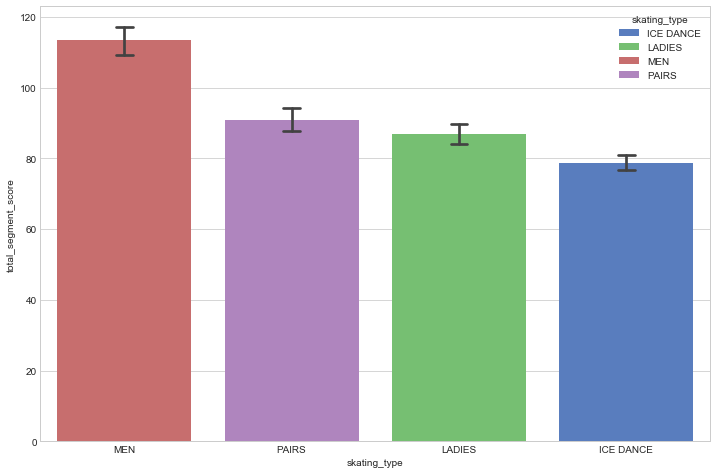

In [28]:
sns.set_style('whitegrid')
plt.figure(figsize=(12, 8))
g = sns.barplot(x="skating_type", y="total_segment_score", data=performance_df, hue="skating_type", palette="muted", ci=95, n_boot=1000, order=["MEN","PAIRS","LADIES","ICE DANCE"], capsize=0.1, dodge=False)

In [29]:
from sklearn.tree import DecisionTreeClassifier
from random import randint

In [30]:
array = ["total_component_score", "total_segment_score", "total_element_score"]
p_train, p_test, program_train, program_test = sk.model_selection.train_test_split(performance_df[array], performance_df["program"], test_size=0.4, random_state=0)
dtree = DecisionTreeClassifier()
treeFit = dtree.fit(p_train, program_train)
predictions_test = dtree.predict(p_test)
accuracy = skm.accuracy_score(y_true=program_test, y_pred=predictions_test)
accuracy

0.46020260492040521

Text(0.5,1,'Confusion Matrix')

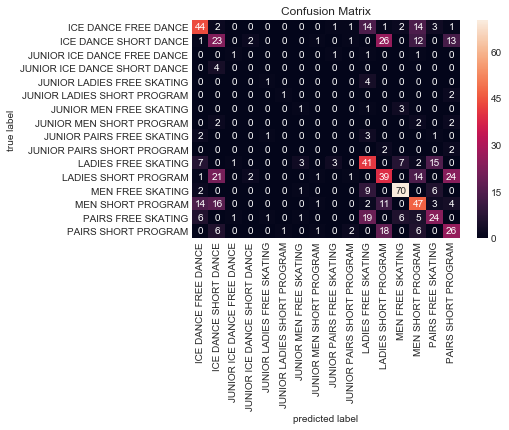

In [31]:
cfmat = skm.confusion_matrix(y_true=program_test, y_pred=predictions_test)
sns.heatmap(cfmat, xticklabels=dtree.classes_, yticklabels=dtree.classes_, annot=True)
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.title('Confusion Matrix')

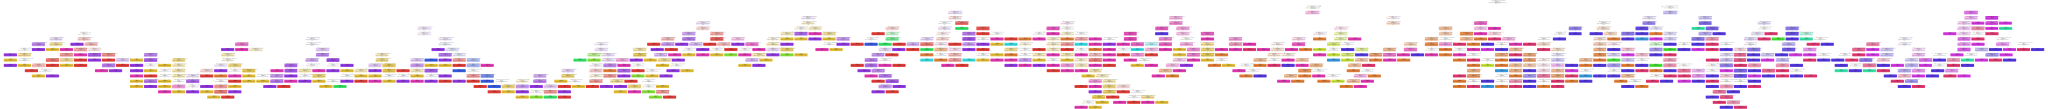

In [32]:
import graphviz
graph_data = sk.tree.export_graphviz(dtree, out_file=None, feature_names=array, filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(graph_data)
graph.render("decision_tree")
graph

In [33]:
df = pd.DataFrame({'element_score': performance_df.total_element_score, 'component_score': performance_df.total_component_score})
dist = spd.squareform(spd.pdist(df, metric="euclidean"))
dist.shape

(1726, 1726)

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  """Entry point for launching an IPython kernel.


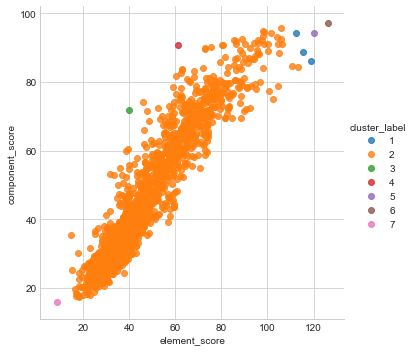

In [40]:
linkage = sph.linkage(dist, method="single")
labels = sph.fcluster(linkage, 120, criterion="distance")
df["cluster_label"] = labels
sns.lmplot(x="element_score", y="component_score", hue="cluster_label", fit_reg=False, data=df)